In [1]:
#%pip install --upgrade pip
#%pip install pandas
#%pip install Jinja2

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
#from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import Pipeline


import pickle

In [2]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn 
#%pip install plotly
#%pip install emoji
#%pip install nltk
#%pip install wordcloud
#%pip install scikit-learn


  Using cached transformers-4.18.0-py3-none-any.whl (4.0 MB)
  Using cached PyYAML-6.0.1-cp36-cp36m-win_amd64.whl (153 kB)
  Using cached filelock-3.4.1-py3-none-any.whl (9.9 kB)
  Using cached huggingface_hub-0.4.0-py3-none-any.whl (67 kB)
  Using cached sacremoses-0.0.53-py3-none-any.whl
  Using cached tokenizers-0.12.1.tar.gz (220 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build tokenizers
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'f:\DMT\Scripts\python.exe' 'f:\DMT\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\SRIHAR~1\AppData\Local\Temp\tmpt5nyj5tz'
       cwd: C:\Users\SRIHAR~1\AppData\Local\Temp\pip-install-30c2r1ot\tokenizers_fede9302f8a64af09cb7da7f668e7000
  Complete output (51 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  creating build\lib.win-amd64-3.6\tokenizers
  copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-3.6\tokenizers
  creating build\lib.win-amd64-3.6\tokenizers\models
  copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-3.6\tokenizers\models
  creating build\lib.win-amd64-3.6\tokenizers\decoders
  copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-3.6\tokenizers\decoders
  creating build\lib.win-amd64-3.6\tokenizers\normalizers
  copying py_src\tokenizers\normalizers\__ini

In [4]:
df=pd.read_csv('F:\DMT\hate_speech_mlma\hate_speech_mlma\cyberbullying_tweets.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [6]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [7]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [8]:
#checking missing values

In [9]:
df.isnull().sum() #no missing values

tweet_text            0
cyberbullying_type    0
dtype: int64

In [10]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [11]:
#renaming

In [12]:
#cleaning and data processing

In [13]:
df=df.rename(columns={
    'tweet_text':'text','cyberbullying_type':'sentiment'
})

In [14]:
df.head()

,text,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [15]:
df['sentiment_encoded']=df['sentiment'].replace({
    'religion':0,
    'age':1,
    'ethnicity':2,
    'gender':3,
    'other_cyberbullying':4,
    'not_cyberbullying':5,
})

In [16]:
df.tail()

,text,sentiment,sentiment_encoded
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,2
47688,Turner did not withhold his disappointment. Tu...,ethnicity,2
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,2
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,2
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,2


In [17]:
#nltk.download('stopwords')

In [18]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [19]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [20]:
stop_words = set(stopwords.words('english'))

In [21]:
#preprocessing of text

In [22]:
# function to remove emojis

def strip_emoji(text):
    return emoji.replace_emoji(text,replace="")

In [23]:
# function to convert text to lowercase, remove (unwanted characters, urls, numbers, stopwords)

def strip_all_entities(text):
    
    text= text.replace('\r', '').replace('\n','').lower()
    text= re.sub(r"(?:\@|https?|-\://)\S+",'',text)
    text= re.sub(r"[^\x00-\x7f]",r'',text)
    text= re.sub('[0-9]+','',text)
    
    stopchars =string.punctuation
    table=str.maketrans('','',stopchars)
    text=text.translate(table)
    
    text=[word for word in text.split() if word not in stop_words]
    text =' '.join(text)
    
    return text

In [24]:
#function to remove contractions

def decontract(text):
    
    text=re.sub(r"cant\'t'" ,"can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text

In [25]:
# funtion to clean hashtags

def clean_hashtags(tweet):
    new_tweet =" ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    
    return new_tweet2

In [26]:
# function to filter special characters

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)        
    return ' '.join(sent)

In [27]:
# removing sequences and applying stemming

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ",text)

def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [28]:
# using all functions

def preprocess(text):
    text = strip_emoji(text)
    text = strip_all_entities(text)
    text = decontract(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    text = lemmatize(text)
    
    return text

In [29]:
df['cleaned_text'] = df['text'].apply(preprocess)
df.head()

,text,sentiment,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5,isi account pretend kurdish account like islam...


In [30]:
# dealing with duplicates

df['cleaned_text'].duplicated().sum()

3011

In [31]:
df.drop_duplicates('cleaned_text' ,inplace=True)

In [32]:
#tokenization

df['tweet_list']=df['cleaned_text'].apply(word_tokenize)

df.head()

,text,sentiment,sentiment_encoded,cleaned_text,tweet_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like..."


In [33]:
#EDA
#checking length of various tweet text

text_len = []
for text in df.tweet_list:
    tweet_len = len(text)
    text_len.append(tweet_len)
    
df['text_len'] = text_len

In [34]:
# removing text without words

df = df[df['text_len']!=0]

In [35]:
df.shape

(44680, 6)

In [36]:
# function to create a word cloud

def plot_wordcloud(cyberbullying_type):
    string = ""
    for i in df[df.sentiment == cyberbullying_type].cleaned_text.values:
        string = string + " " + i.strip()
        
    wordcloud = WordCloud(background_color = 'white',max_words=2000, max_font_size=256,random_state=42).generate(string)
    
    
#plot the wordcloud image

    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cyberbullying_type)
    plt.show()
    del string

In [37]:
#splitting data based on sentiment for EDA

not_cyberbullying_type = df[df['sentiment']=='not_cyberbullying']
gender_type = df[df['sentiment']=='gender']
religion_type = df[df['sentiment']=='religion']
other_cyberbullying_type = df[df['sentiment']=='other_cyberbullying']
age_type = df[df['sentiment']=='age']
ethnicity_type = df[df['sentiment']=='ethnicity']

In [38]:
#EDA

In [39]:
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top25_gender = pd.DataFrame(gender.most_common(25))
top25_gender.columns = ['Top Words','Count']
top25_gender.head(25)

,Top Words,Count
0,joke,5173
1,rape,4066
2,gay,3847
3,call,1401
4,make,1288
5,rt,1218
6,woman,1181
7,bitch,1145
8,femal,1108
9,im,1083


Text(0.5, 1.0, 'Top 25 words in Gender Cyberbullying')

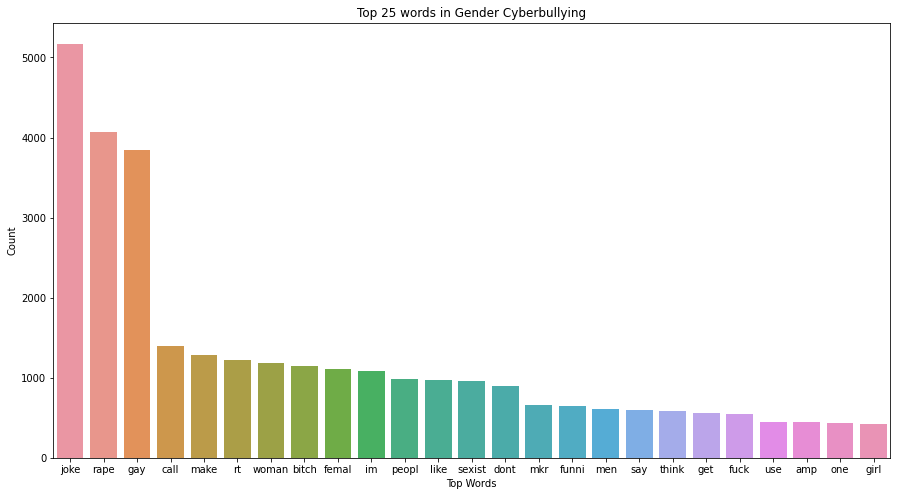

In [40]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_gender, y="Count", x="Top Words")
plt.title("Top 25 words in Gender Cyberbullying")

In [41]:
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
top25_religion = pd.DataFrame(religion.most_common(25))
top25_religion.columns = ['Top Words','Count']
top25_religion.style.background_gradient(cmap='Greens')


,Top Words,Count
0,muslim,4618
1,idiot,3073
2,islam,2438
3,christian,2132
4,u,1919
5,terrorist,1379
6,right,1290
7,like,1276
8,support,1250
9,woman,1247


Text(0.5, 1.0, 'Top 25 words in Religion Cyberbullying')

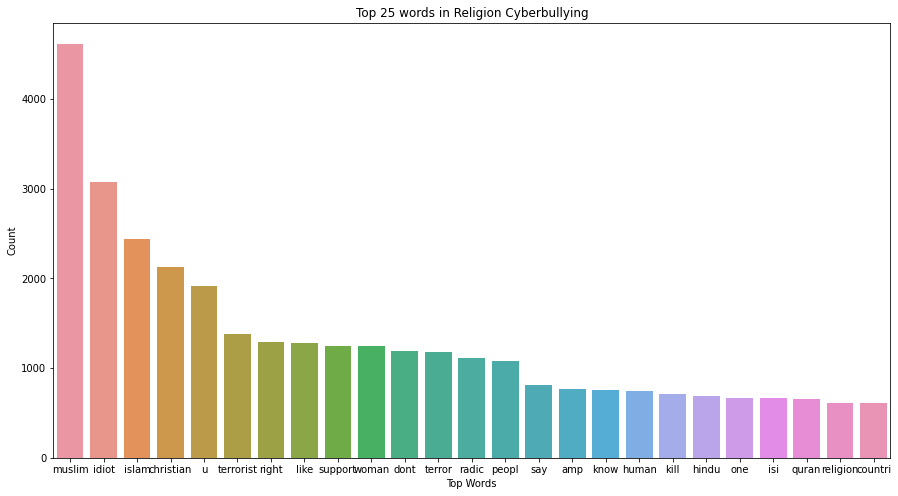

In [42]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_religion, y="Count", x="Top Words")
plt.title("Top 25 words in Religion Cyberbullying")

In [43]:
age = Counter([item for sublist in age_type['tweet_list'] for item in sublist])
top25_age = pd.DataFrame(age.most_common(25))
top25_age.columns = ['Top Words','Count']
top25_age.style.background_gradient(cmap='Greens')

,Top Words,Count
0,bulli,8902
1,school,8427
2,high,4861
3,girl,4615
4,like,2079
5,get,1051
6,one,1043
7,peopl,934
8,im,916
9,got,842


Text(0.5, 1.0, 'Top 25 words in Age Cyberbullying')

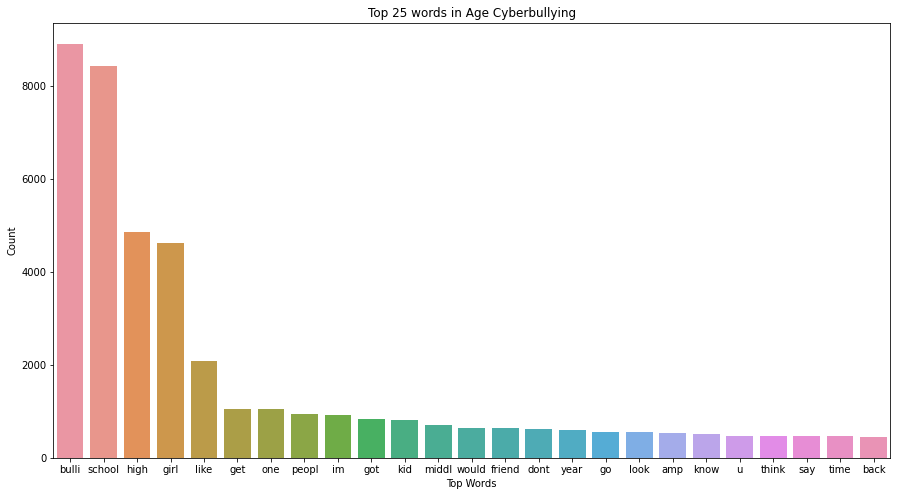

In [44]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_age, y="Count", x="Top Words")
plt.title("Top 25 words in Age Cyberbullying")

In [45]:
ethnicity = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])
top25_ethnicity = pd.DataFrame(ethnicity.most_common(25))
top25_ethnicity.columns = ['Top Words','Count']
top25_ethnicity.style.background_gradient(cmap='Greens')

,Top Words,Count
0,fuck,5890
1,nigger,5459
2,dumb,5005
3,as,2240
4,black,2134
5,u,2099
6,white,1557
7,call,1381
8,peopl,1182
9,rt,1163


Text(0.5, 1.0, 'Top 25 words in Ethnicity Cyberbullying')

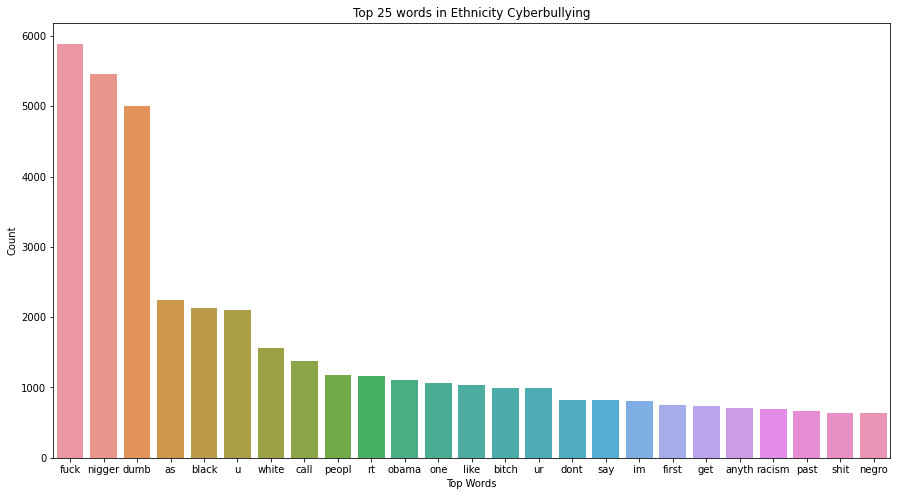

In [46]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_ethnicity, y="Count", x="Top Words")
plt.title("Top 25 words in Ethnicity Cyberbullying")

In [47]:
other_cyberbullying = Counter([item for sublist in other_cyberbullying_type['tweet_list'] for item in sublist])
top25_other_cyberbullying = pd.DataFrame(other_cyberbullying.most_common(25))
top25_other_cyberbullying.columns = ['Top Words','Count']
top25_other_cyberbullying.style.background_gradient(cmap='Greens')

,Top Words,Count
0,bulli,884
1,rt,717
2,im,595
3,fuck,509
4,like,423
5,get,393
6,dont,393
7,peopl,352
8,go,277
9,idiot,262


Text(0.5, 1.0, 'Top 25 words in Other Cyberbullying')

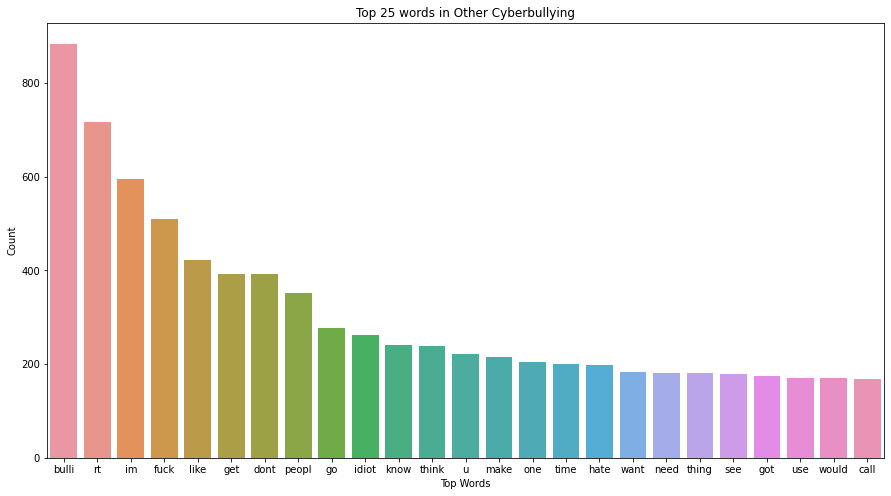

In [48]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_other_cyberbullying, y="Count", x="Top Words")
plt.title("Top 25 words in Other Cyberbullying")

In [49]:
not_cyberbullying = Counter([item for sublist in not_cyberbullying_type['tweet_list'] for item in sublist])
top25_not_cyberbullying = pd.DataFrame(not_cyberbullying.most_common(25))
top25_not_cyberbullying.columns = ['Top Words','Count']
top25_not_cyberbullying.style.background_gradient(cmap='Greens')

,Top Words,Count
0,mkr,1667
1,bulli,1101
2,rt,781
3,im,474
4,like,424
5,get,423
6,go,394
7,school,375
8,dont,373
9,kat,286


Text(0.5, 1.0, 'Top 25 words in Not Cyberbullying')

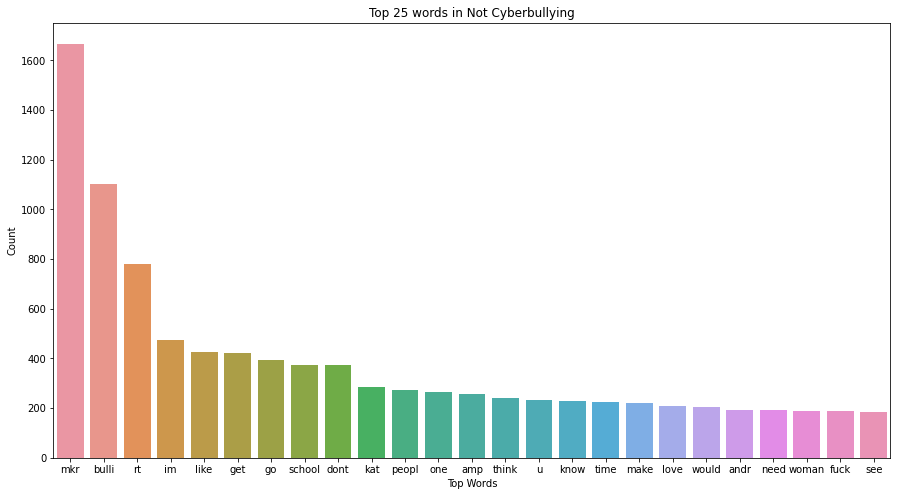

In [50]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_not_cyberbullying, y="Count", x="Top Words")
plt.title("Top 25 words in Not Cyberbullying")

In [51]:
df.head()

,text,sentiment,sentiment_encoded,cleaned_text,tweet_list,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,5,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,5,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...",11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,5,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,5,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d...",9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,5,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like...",8


In [52]:
sentiments = ["religion", "age", "ethnicity", "gender", "other_cyberbullying", "not_cyberbullying"]

In [53]:
# Modelling

In [54]:
# Splitting data into test and train

In [55]:
X,Y = df['cleaned_text'],df['sentiment_encoded']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35744,) (35744,) (8936,) (8936,)


In [57]:
# tf - idf vectorization

In [58]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(35744, 31811)
(8936, 31811)


In [59]:
# trying differnt models

# XGBoost

In [60]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
import xgboost as xgb

In [62]:
xg= xgb.XGBClassifier(n_estimators=100)

In [63]:
xg.fit(X_train_tf,y_train)

[16:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [64]:
pred=xg.predict(X_test_tf)

In [65]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.8473589973142346
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1590
           1       0.99      0.97      0.98      1577
           2       0.99      0.98      0.98      1554
           3       0.91      0.85      0.88      1524
           4       0.60      0.50      0.55      1160
           5       0.60      0.74      0.66      1531

    accuracy                           0.85      8936
   macro avg       0.84      0.83      0.83      8936
weighted avg       0.85      0.85      0.85      8936



# Gradient Boost

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators= 50)

model.fit(X_train_tf,y_train.values.ravel())

acc_score = model.score(X_test_tf, y_test)
print("model score: %.3f" % acc_score)

y_pred=model.predict(X_test_tf)
print(classification_report(y_test,y_pred))

model score: 0.825
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1590
           1       0.99      0.96      0.98      1577
           2       0.99      0.97      0.98      1554
           3       0.94      0.79      0.86      1524
           4       0.60      0.38      0.47      1160
           5       0.53      0.81      0.64      1531

    accuracy                           0.82      8936
   macro avg       0.84      0.81      0.81      8936
weighted avg       0.85      0.82      0.83      8936



# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf.fit(X_train_tf,y_train)

RandomForestClassifier(criterion='entropy')

In [68]:
pred = rf.predict(X_test_tf)
accuracy=accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.846911369740376
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1590
           1       0.97      0.97      0.97      1577
           2       0.98      0.98      0.98      1554
           3       0.90      0.85      0.88      1524
           4       0.60      0.55      0.58      1160
           5       0.61      0.69      0.65      1531

    accuracy                           0.85      8936
   macro avg       0.84      0.83      0.84      8936
weighted avg       0.85      0.85      0.85      8936



# LogisticRegression

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tf,y_train)

LogisticRegression()

In [70]:
pred = lr.predict(X_test_tf)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.8417636526410027
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1590
           1       0.94      0.97      0.96      1577
           2       0.98      0.98      0.98      1554
           3       0.92      0.84      0.88      1524
           4       0.59      0.59      0.59      1160
           5       0.62      0.66      0.64      1531

    accuracy                           0.84      8936
   macro avg       0.83      0.83      0.83      8936
weighted avg       0.85      0.84      0.84      8936



# DecisionTree

In [71]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(criterion='entropy',random_state=42)
df.fit(X_train_tf,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [72]:
pred = df.predict(X_test_tf)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.8171441360787824
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1590
           1       0.98      0.96      0.97      1577
           2       0.98      0.97      0.98      1554
           3       0.86      0.83      0.84      1524
           4       0.53      0.52      0.53      1160
           5       0.56      0.63      0.59      1531

    accuracy                           0.82      8936
   macro avg       0.81      0.80      0.81      8936
weighted avg       0.82      0.82      0.82      8936



# Ensemble Learning (Hybrid approach - RandomForest,LR, XGBoost)

In [73]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
xgb_model = XGBClassifier(n_estimators = 50, random_state = 42)
lr_model = LogisticRegression()

rf_model.fit(X_train_tf, y_train)
xgb_model.fit(X_train_tf, y_train)
lr_model.fit(X_train_tf, y_train)

[16:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LogisticRegression()

In [74]:
rf_preds = rf_model.predict(X_test_tf)
xgb_preds = xgb_model.predict(X_test_tf)
lr_preds = lr_model.predict(X_test_tf)

voting_clf = VotingClassifier(estimators=[
      ('random_forest', rf_model),
      ('xgboost', xgb_model),
      ('lr', lr_model)
  ], voting='hard')

voting_clf.fit(X_train_tf, y_train)

[16:31:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            mono

In [75]:
ensemble_preds = voting_clf.predict(X_test_tf)

In [76]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("KNN Accuracy:", accuracy_score(y_test, lr_preds))
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))
print(classification_report(y_test,ensemble_preds))

Random Forest Accuracy: 0.8473589973142346
XGBoost Accuracy: 0.8470232766338407
KNN Accuracy: 0.8417636526410027
Ensemble Accuracy: 0.8532900626678603
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1590
           1       0.96      0.98      0.97      1577
           2       0.98      0.99      0.98      1554
           3       0.91      0.85      0.88      1524
           4       0.63      0.55      0.59      1160
           5       0.62      0.72      0.67      1531

    accuracy                           0.85      8936
   macro avg       0.85      0.84      0.84      8936
weighted avg       0.86      0.85      0.85      8936



# BERT Model

In [77]:
%pip install tensorflow
%pip install tensorflow-text

In [78]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [79]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [80]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

 #Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [81]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_type_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'encoder_outputs':  109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [82]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [83]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
 873/1117 [======================>.......] - ETA: 1:38:45 - loss: 0.0000e+00 - accuracy: 0.1755

In [ ]:
model.evaluate(X_test, y_test)


280/280 [==============================] - 1946s 7s/step - loss: 0.0000e+00 - accuracy: 0.1765


[0.0, 0.17647716403007507]